In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [123]:
rand_state = 1000

In [124]:
df = pd.read_csv('wage_regularization.csv')
df.head()

,wage,educ,educ2,educ3,educ4,educ5,age,age2,age3,age4,age5
0,769000.0,12,144,1728,20736,248832,31,961,29791,923521,28629151
1,808000.0,18,324,5832,104976,1889568,37,1369,50653,1874161,69343957
2,825000.0,14,196,2744,38416,537824,33,1089,35937,1185921,39135393
3,650000.0,12,144,1728,20736,248832,32,1024,32768,1048576,33554432
4,562000.0,11,121,1331,14641,161051,34,1156,39304,1336336,45435424


### Scaling the features to easily compare the coefficients

In [125]:
from sklearn.preprocessing import StandardScaler

In [126]:
scaler=StandardScaler()
df_sc= scaler.fit_transform(df)

In [127]:
# converting the scaled data back into a dataframe
df_sc = pd.DataFrame(df_sc, columns=df.columns)
df_sc.head()

,wage,educ,educ2,educ3,educ4,educ5,age,age2,age3,age4,age5
0,-0.467520,-0.668851,-0.681389,-0.683465,-0.677116,-0.664268,-0.669710,-0.691203,-0.708954,-0.723031,-0.733576
1,-0.371019,2.064038,2.223684,2.379630,2.530868,2.675999,1.261947,1.281608,1.297931,1.310810,1.320211
2,-0.328955,0.242112,0.157854,0.074845,-0.003836,-0.075928,-0.025824,-0.072282,-0.117721,-0.161641,-0.203607
3,-0.761969,-0.668851,-0.681389,-0.683465,-0.677116,-0.664268,-0.347767,-0.386577,-0.422573,-0.455483,-0.485129
4,-0.979713,-1.124333,-1.052593,-0.979773,-0.909223,-0.842975,0.296119,0.251685,0.206178,0.160164,0.114187


We are scaling before we are splitting in this scenario before splitting but normally we do it after we split the data and only do fit it to the train data in order to keep the test data completely unseen. 

### Splitting the data into training and test data

In [128]:
y = df_sc['wage']
X = df_sc.drop('wage', axis=1) # be careful, inplace= False

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rand_state)
X_train.head()

,educ,educ2,educ3,educ4,educ5,age,age2,age3,age4,age5
932,-0.668851,-0.681389,-0.683465,-0.677116,-0.664268,-1.635539,-1.547054,-1.463051,-1.383830,-1.309577
82,-1.124333,-1.052593,-0.979773,-0.909223,-0.842975,1.261947,1.281608,1.297931,1.310810,1.320211
370,1.608556,1.658809,1.693718,1.713830,1.719745,1.583890,1.644257,1.703790,1.762179,1.819156
452,-0.668851,-0.681389,-0.683465,-0.677116,-0.664268,0.940004,0.928630,0.913427,0.894592,0.872387
132,-0.668851,-0.681389,-0.683465,-0.677116,-0.664268,-0.669710,-0.691203,-0.708954,-0.723031,-0.733576


### Creating a default model using Statsmodels.api

In [129]:
import statsmodels.api as sm

In [130]:
X_test_wc = sm.add_constant(X_test)
X_train_wc = sm.add_constant(X_train)

In [131]:
model = sm.OLS(y_train, X_train_wc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.128
Model:                            OLS   Adj. R-squared:                  0.116
Method:                 Least Squares   F-statistic:                     10.81
Date:                Mon, 19 Feb 2024   Prob (F-statistic):           2.83e-17
Time:                        21:05:54   Log-Likelihood:                -1016.0
No. Observations:                 748   AIC:                             2054.
Df Residuals:                     737   BIC:                             2105.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0028      0.035     -0.080      0.937      -0.071       0.065
educ        -109.9917    192.003     -0.573      0.567    -486.931     266.947
educ2        462.5622    824.114      0.561      0.575   -1155.328    2080.452
educ3       -736.3809   1339.181     -0.550      0.583   -3365.445    1892.684
educ4        527.4761    974.843      0.541      0.589   -1386.323    2441.276
educ5       -143.4145    267.848     -0.535      0.593    -669.250     382.421
age        -1295.3370   4397.692     -0.295      0.768   -9928.834    7338.159
age2        5164.4620   1.79e+04      0.289      0.773   -2.99e+04    4.03e+04
age3       -7783.0117   2.73e+04     -0.285      0.776   -6.15e+04    4.59e+04
age4        5255.0538   1.87e+04      0.282      0.778   -3.14e+04    4.19e+04
age5       -1341.0611   4794.082     -0.280      0.780   -1.08e+04    8070.622
==============================================================================
Omnibus:                      202.208   Durbin-Watson:                   1.936
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              653.255
Skew:                           1.286   Prob(JB):                    1.40e-142
Kurtosis:                       6.787   Cond. No.                     2.44e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.44e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The R squared is 12.8% which is very low. None of the coefficients are statistically significant at the 5% level which indicates we could have issues with collinearity. 

### Fitting Model for Initial Performance

In [132]:
from sklearn.linear_model import LinearRegression, Ridge,RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV

model_linear = LinearRegression()
model_ridge = Ridge()
model_lasso = Lasso()
model_net = ElasticNet()

In [133]:
y_hat_linear= model_linear.fit(X_train, y_train).predict(X_test)
y_hat_ridge = model_ridge.fit(X_train, y_train).predict(X_test)
y_hat_lasso = model_lasso.fit(X_train, y_train).predict(X_test)
y_hat_net   = model_net.fit(X_train, y_train).predict(X_test)

In [134]:
df_predictions = pd.DataFrame({'y_test':y_test,
                               'y_hat_linear':y_hat_linear,
                               'y_hat_ridge':y_hat_ridge,
                               'y_hat_lasso':y_hat_lasso,
                               'y_hat_net':y_hat_net})
df_predictions.head()

,y_test,y_hat_linear,y_hat_ridge,y_hat_lasso,y_hat_net
434,0.042199,-0.267170,-0.202696,-0.012852,-0.012852
238,1.910343,0.699718,0.704007,-0.012852,-0.012852
531,-0.700110,-0.065042,0.045579,-0.012852,-0.012852
157,2.328510,0.689508,0.653410,-0.012852,-0.012852
601,1.341239,0.208652,0.171149,-0.012852,-0.012852


In [135]:
coefficients = pd.DataFrame({'Features':df.drop('wage', axis=1, inplace=False).columns})
coefficients['model_lin']= model_linear.coef_
coefficients['model_ridge']= model_ridge.coef_
coefficients['model_lasso']= model_lasso.coef_
coefficients['model_net']= model_net.coef_
coefficients

,Features,model_lin,model_ridge,model_lasso,model_net
0,educ,-109.991745,0.169172,0.0,0.0
1,educ2,462.562174,0.309854,0.0,0.0
2,educ3,-736.380870,0.232209,0.0,0.0
3,educ4,527.476086,-0.016857,0.0,0.0
4,educ5,-143.414487,-0.393124,0.0,0.0
5,age,-1295.337041,0.005242,0.0,0.0
6,age2,5164.461998,0.136966,0.0,0.0
7,age3,-7783.011674,0.147814,0.0,0.0
8,age4,5255.053786,0.043936,0.0,0.0
9,age5,-1341.061045,-0.166490,0.0,0.0


All of the coefficients are 0 for the lasso and elastic net because the default alpha is to large and it is eliminating all variables

### Plotting the Coefficients vs Alphas

In [136]:
alphas = 10**np.linspace(-4,2,100)

#### 1. Ridge Regression

In [137]:
ridge = Ridge()
coefs_ridge = []

for i in alphas:
    ridge.set_params(alpha = i)
    ridge.fit(X_train, y_train)
    coefs_ridge.append(ridge.coef_)
    
np.shape(coefs_ridge)

(100, 10)

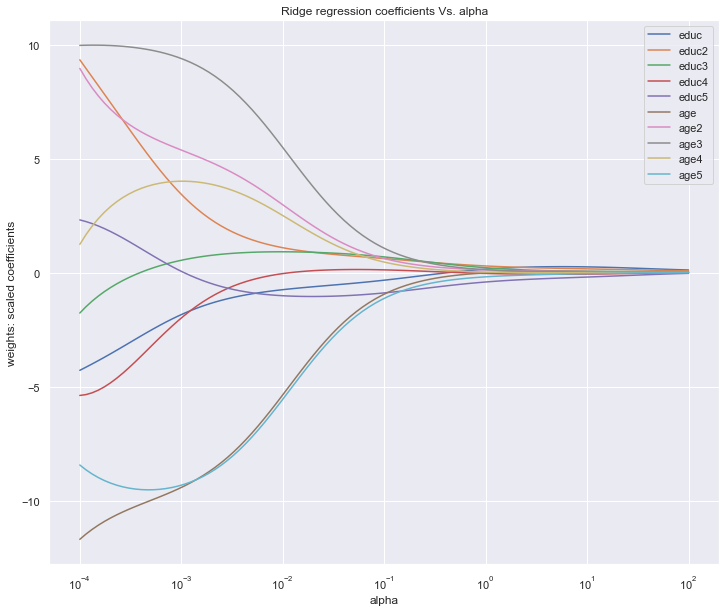

In [138]:
plt.figure(figsize=(12,10))
ax = plt.gca()
ax.plot(alphas, coefs_ridge)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights: scaled coefficients')
plt.title('Ridge regression coefficients Vs. alpha')
plt.legend(df.drop('wage',axis=1, inplace=False).columns)

plt.show()

This plot is showing that at an alpha of 0.1 most coefficients are close to 0. It appears that age 4 becomes 0 first which means the model isn't very sensitive to this feature. 

#### 2. Lasso Regression

In [139]:
lasso = Lasso()
coefs_lasso = []

for i in alphas:
    lasso.set_params(alpha = i)
    lasso.fit(X_train, y_train)
    coefs_lasso.append(lasso.coef_)
    
np.shape(coefs_lasso)

(100, 10)

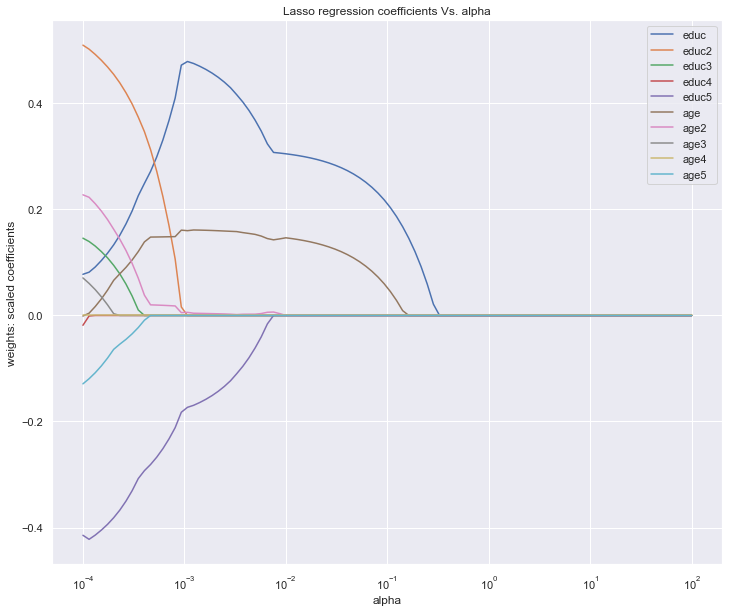

In [140]:
plt.figure(figsize=(12,10))
ax = plt.gca()
ax.plot(alphas, coefs_lasso)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights: scaled coefficients')
plt.title('Lasso regression coefficients Vs. alpha')
plt.legend(df.drop('wage',axis=1, inplace=False).columns)

plt.show()

Majority of the features become 0 at an alpha of 0.001. The model is still sensitive to educ 5, age, and educ at this point. 

#### 3. Elastic Net Regression

In [141]:
elasticnet = ElasticNet()
coefs_elasticnet = []

for i in alphas:
    elasticnet.set_params(alpha = i)
    elasticnet.fit(X_train, y_train)
    coefs_elasticnet.append(elasticnet.coef_)
    
np.shape(coefs_elasticnet)

(100, 10)

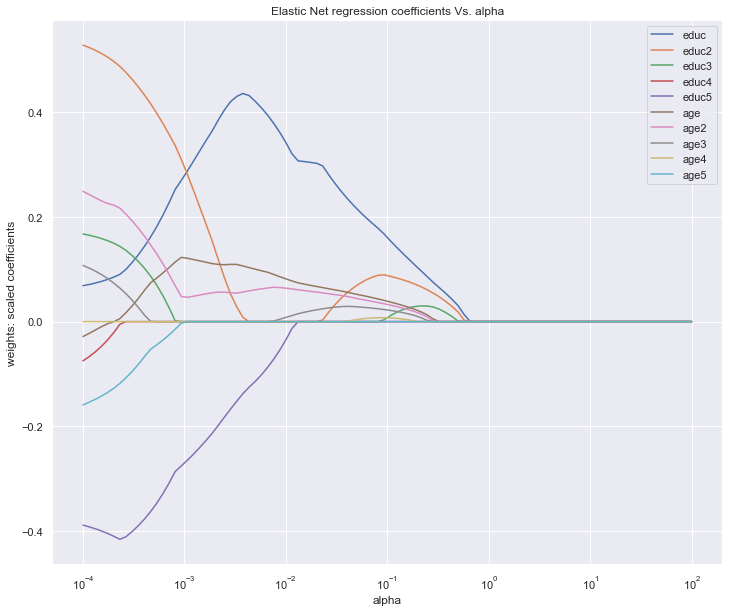

In [142]:
plt.figure(figsize=(12,10))
ax = plt.gca()
ax.plot(alphas, coefs_elasticnet)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights: scaled coefficients')
plt.title('Elastic Net regression coefficients Vs. alpha')
plt.legend(df.drop('wage',axis=1, inplace=False).columns)

plt.show()

Most of the features are reduced to a 0 coefficient between 0.1 and 1. The coefficient for educ actually increases as alpha increases for a short time then it also decreases down to 0. 

Question 6: 
1. The two that drop the most appear to age and age3.
2. The two that survive are age and educ

### Cross Validation to find the Optimal Alpha

#### Ridge Regression

In [143]:
ridgecv = RidgeCV(alphas=alphas)
ridgecv.fit(X_train, y_train)
ridgecv.alpha_

0.004977023564332114

In [144]:
alpha_ridge_opt = ridgecv.alpha_

In [145]:
ridgecv.coef_

array([-0.91098705,  1.45592853,  0.90869226, -0.29686326, -0.86650638,
       -7.01043122,  3.90366929,  7.16103252,  3.26168886, -7.18500268])

#### Lasso Regression

In [146]:
lassocv = LassoCV(alphas=alphas)
lassocv.fit(X_train, y_train)
lassocv.alpha_

0.01

In [147]:
alpha_lasso_opt = lassocv.alpha_

In [148]:
lassocv.coef_

array([ 3.05014980e-01,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  1.46529614e-01,  1.10315220e-04,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00])

#### Elastic Net Regression

In [149]:
elasticnetcv = ElasticNetCV(alphas=alphas, l1_ratio=np.linspace(0.0, 1, 11))
elasticnetcv.fit(X_train, y_train)
elasticnetcv.alpha_

0.01519911082952933

In [150]:
elasticnetcv.l1_ratio_

0.7000000000000001

In [151]:
alpha_elasticnet_opt = elasticnetcv.alpha_

In [152]:
elasticnetcv.coef_

array([ 0.30315252,  0.        ,  0.        ,  0.        , -0.        ,
        0.08183184,  0.06151766,  0.00225436,  0.        ,  0.        ])

### Refitting the Model with cross validated hyperparameters

In [153]:
model_linear = LinearRegression()
model_ridge = Ridge(alpha= alpha_ridge_opt)
model_lasso = Lasso(alpha= alpha_lasso_opt)
model_net = ElasticNet(alpha= alpha_elasticnet_opt)

In [154]:
y_hat_linear= model_linear.fit(X_train, y_train).predict(X_test)
y_hat_ridge = model_ridge.fit(X_train, y_train).predict(X_test)
y_hat_lasso = model_lasso.fit(X_train, y_train).predict(X_test)
y_hat_net   = model_net.fit(X_train, y_train).predict(X_test)

In [155]:
df_predictions_optimal = pd.DataFrame({'y_test':y_test,
                               'y_hat_linear':y_hat_linear,
                               'y_hat_ridge':y_hat_ridge,
                               'y_hat_lasso':y_hat_lasso,
                               'y_hat_net':y_hat_net})
df_predictions_optimal.head()

,y_test,y_hat_linear,y_hat_ridge,y_hat_lasso,y_hat_net
434,0.042199,-0.267170,-0.252619,-0.214151,-0.215513
238,1.910343,0.699718,0.686303,0.810961,0.816272
531,-0.700110,-0.065042,-0.037980,0.024603,0.033229
157,2.328510,0.689508,0.671949,0.763748,0.765475
601,1.341239,0.208652,0.223092,0.155429,0.157474


### Scores for the optimal alphas

#### 1. Linear Regression

In [156]:
model_linear.score(X_test, y_test)

0.1983485557614555

In [157]:
MSE_test_lin = np.mean(np.square(df_predictions_optimal['y_test'] - df_predictions_optimal['y_hat_linear']))
RMSE_test_lin = np.sqrt(MSE_test_lin)
np.round(RMSE_test_lin,3)

0.865

#### 2. Ridge Regression

In [158]:
model_ridge.score(X_test, y_test)

0.19932369769739267

In [159]:
MSE_test_ridge = np.mean(np.square(df_predictions_optimal['y_test'] - df_predictions_optimal['y_hat_ridge']))
RMSE_test_ridge = np.sqrt(MSE_test_ridge)
np.round(RMSE_test_ridge,3)

0.864

#### 3. Lasso Regression

In [160]:
model_lasso.score(X_test, y_test)

0.19270451107452435

In [161]:
MSE_test_lasso = np.mean(np.square(df_predictions_optimal['y_test'] - df_predictions_optimal['y_hat_lasso']))
RMSE_test_lasso = np.sqrt(MSE_test_lasso)
np.round(RMSE_test_lasso,3)

0.868

#### Elastic Net Regression

In [162]:
model_net.score(X_test, y_test)

0.19257414876337753

In [163]:
MSE_test_net = np.mean(np.square(df_predictions_optimal['y_test'] - df_predictions_optimal['y_hat_net']))
RMSE_test_net = np.sqrt(MSE_test_net)
np.round(RMSE_test_net,3)

0.868

### Ranking the models based on RMSE performance

Model Ranks
1. Ridge
2. Default
3. Lasso
4. Elastic Net

We were able to very slightly beat the default model with the Ridge Regression method. I believe this means that the data is linear in shape indicating the linear model should perform the best. 